In [ ]:
"""
    @Tashi Chotso
"""

'\n    @Tashi Chotso\n'

# 1.Loading Data 

In [1]:

#import neccessary packages
#packages for pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as f
from pyspark.sql.types import IntegerType

#libraries for visualizaton
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#packages for modelling and encoding 
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import col, log, isnan, count
from pyspark.ml.feature import Imputer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline

In [2]:
from pyspark.sql import SparkSession

spark = (SparkSession.builder.appName("Capstone")\
         .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
         .enableHiveSupport().getOrCreate())
spark

# 2. Data Cleaning /Mugging 

In [3]:
#dimension of all six tables 
print("total records in dept_manager dataset",spark.sql("select * from finalexl.dept_managers").count())
print("total records in titles dataset ",spark.sql("select * from finalexl.titles").count())
print("total records in employees dataset",spark.sql("select * from finalexl.employees").count())
print("total records in dept_emp dataset",spark.sql("select * from finalexl.dept_emp").count())
print("total records in salaires ",spark.sql("select * from finalexl.salaries").count())
print('total records in department',spark.sql("select * from finalexl.department").count())

total records in dept_manager dataset 24
total records in titles dataset  7
total records in employees dataset 300024
total records in dept_emp dataset 331603
total records in salaires  300024
total records in department 9


In [4]:
#view records in table
dept_managers=spark.sql("select * from finalexl.dept_managers")
titles=spark.sql("select * from finalexl.titles")
employees=spark.sql("select * from finalexl.employees")
dept_emp=spark.sql("select * from finalexl.dept_emp")
salaries=spark.sql("select * from finalexl.salaries")
department=spark.sql("select * from finalexl.department")


In [ ]:
#write in csv 
#titles.write.csv("titles.csv")
#employees.write.csv("employees.csv")
#dept_emp.write.csv("dept_emp.csv")
#salaries.write.csv("salaries.csv")
#department.write.csv("department.csv")

In [5]:
#write to csv
dept_managers = spark.read.csv("dept_managers.csv")
titles = spark.read.csv("titles.csv")
employees = spark.read.csv("employees.csv")
dept_emp= spark.read.csv("dept_emp.csv")
salaries= spark.read.csv("salaries.csv")
department = spark.read.csv("department.csv")

In [6]:
#rename columns
salaries= salaries.withColumnRenamed('_c0', 'emp_no')\
       .withColumnRenamed('_c1','salary')
salaries.show(2)

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
+------+------+
only showing top 2 rows



In [7]:
#rename columns
department= department.withColumnRenamed('_c0', 'dept_no')\
       .withColumnRenamed('_c1','dept_name')
department.show(2)

+-------+---------+
|dept_no|dept_name|
+-------+---------+
|   d001|Marketing|
|   d002|  Finance|
+-------+---------+
only showing top 2 rows



In [8]:
#rename columns
dept_emp= dept_emp.withColumnRenamed('_c0', 'emp_no')\
       .withColumnRenamed('_c1','dept_no')
dept_emp.show(2)

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
+------+-------+
only showing top 2 rows



In [9]:
#rename columns
dept_managers= dept_managers.withColumnRenamed('_c0', 'dept_no')\
       .withColumnRenamed('_c1','emp_no')
dept_managers.show(2)

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
+-------+------+
only showing top 2 rows



In [10]:
#rename title table
titles= titles.withColumnRenamed('_c0', 'title_id')\
       .withColumnRenamed('_c1','title')
titles.show(2)

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
+--------+------------------+
only showing top 2 rows



In [11]:
#rename cols using withColumnRename func
employees= employees.withColumnRenamed('_c0', 'emp_no')\
       .withColumnRenamed('_c1','emp_title_id')\
       .withColumnRenamed('_c2','birth_date')\
       .withColumnRenamed('_c3','first_name')\
       .withColumnRenamed('_c4','last_name')\
       .withColumnRenamed('_c5','sex')\
       .withColumnRenamed('_c6','hire_date')\
       .withColumnRenamed('_c7','no_of_projects')\
       .withColumnRenamed('_c8','Last_performance')\
       .withColumnRenamed('_c9','left_organisation')\
     .withColumnRenamed('_c10','last_date')        

employees.show(3)

+------+------------+----------+----------+---------+---+----------+--------------+----------------+-----------------+---------+
|emp_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|Last_performance|left_organisation|last_date|
+------+------------+----------+----------+---------+---+----------+--------------+----------------+-----------------+---------+
| 10001|       e0003|  9/2/1953|    Georgi|  Facello|  M| 6/26/1986|             9|               C|                1|7/30/1994|
| 10002|       s0001|  6/2/1964|   Bezalel|   Simmel|  F|11/21/1985|             8|               B|                0|     \"\"|
| 10003|       e0003| 12/3/1959|     Parto|  Bamford|  M| 8/28/1986|             1|               C|                0|     \"\"|
+------+------------+----------+----------+---------+---+----------+--------------+----------------+-----------------+---------+
only showing top 3 rows



In [94]:
#combine table
emp_df = employees.join(dept_emp,on = 'emp_no', how = 'left') \
        .join(department, on='dept_no',how = 'left') \
        .join(salaries, on ='emp_no', how = 'left') \
        .join(titles, employees.emp_title_id == titles.title_id, 'left')

In [ ]:
#dataset schema
emp_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: string (nullable = true)
 |-- Last_performance: string (nullable = true)
 |-- left_organisation: string (nullable = true)
 |-- last_date: string (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)



In [ ]:
#handling misssing data
from pyspark.sql.functions import col,sum
emp_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in emp_df.columns)).show()

+------+-------+------------+----------+----------+---------+---+---------+--------------+----------------+-----------------+---------+---------+------+--------+-----+
|emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date|no_of_projects|Last_performance|left_organisation|last_date|dept_name|salary|title_id|title|
+------+-------+------------+----------+----------+---------+---+---------+--------------+----------------+-----------------+---------+---------+------+--------+-----+
|     0|      0|           0|         0|         0|        0|  0|        0|             0|               0|                0|        0|        0|     0|       0|    0|
+------+-------+------------+----------+----------+---------+---+---------+--------------+----------------+-----------------+---------+---------+------+--------+-----+



In [ ]:
#Handling duplicate data
n1=emp_df.count()
print("Number of orginal data rows:",n1)
n2=emp_df.dropDuplicates().count()
print("Number of data rows after deleting duplicated data :",n2)
n3=n1-n2
print("Number of duplicate rows :",n3)

Number of orginal data rows: 331603
Number of data rows after deleting duplicated data : 331603
Number of duplicate rows : 0


 # 3.Explortary Data Analysis 

In [12]:
# showing employee number, name , sex, and salary for each employee1  from max earning to lower 
df1=spark.sql("""
select employees.emp_no, employees.last_name, employees.first_name, employees.sex, 
salaries.salary FROM employees JOIN salaries ON employees.emp_no = salaries.emp_no order by salaries.salary desc limit 20 """).show()

+------+---------------+----------+---+------+
|emp_no|      last_name|first_name|sex|salary|
+------+---------------+----------+---+------+
|235675|           Zykh|    Yahiko|  M| 99999|
|213379|       Einsfeld|      Moon|  F| 99993|
|425641|     Lindenbaum|     Jeong|  F| 99990|
| 31607|      Backhouse| Valdiodio|  F| 99988|
|205875|        Niizuma|   Muzhong|  F| 99984|
| 31499|        Pollock|   Naftali|  M| 99981|
|278540|        Iacovou|    Naraig|  M| 99978|
|498461|        Zwicker|  Hironobu|  F| 99977|
| 70087|     Lemarechal|   Ronghao|  F| 99976|
|282731|         Kamber| Moriyoshi|  F| 99973|
|415886|Vanwelkenhuysen|   Licheng|  M| 99959|
| 31595|      Barbanera|     Stevo|  M| 99948|
|420951|        Ventosa| Moriyoshi|  M| 99939|
|242204|        Grabner|      Kien|  F| 99937|
| 87374|        Maraist|  Sampalli|  M| 99927|
|435343|     Collavizza|    Yinlin|  M| 99918|
|490610|        Mamelak| Jamaludin|  M| 99904|
|476850|       Feinberg|     Denny|  M| 99903|
| 61601|     

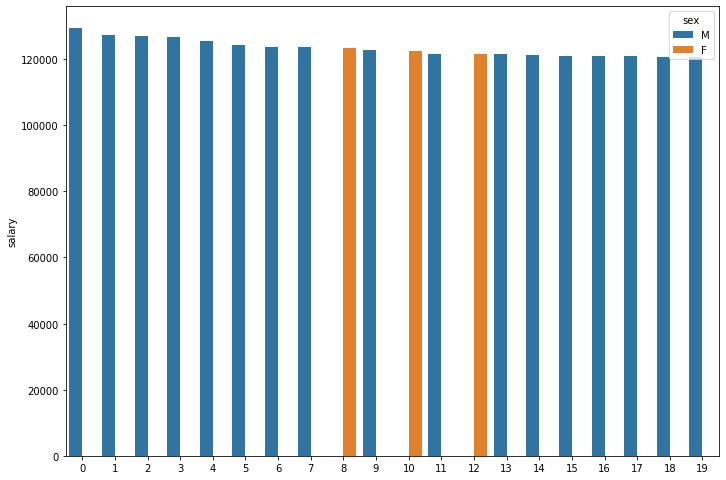

In [ ]:
#top five max earning employee
earning_df=spark.sql("""
select employees.emp_no,employees.sex,sum(salaries.salary) salary
FROM employees JOIN salaries ON 
employees.emp_no = salaries.emp_no  group by employees.emp_no, employees.sex order by salary desc limit 20

""")
plt1=earning_df.toPandas()
index=np.arange(20)
sns.barplot(x=index ,y='salary',hue='sex',data=plt1)


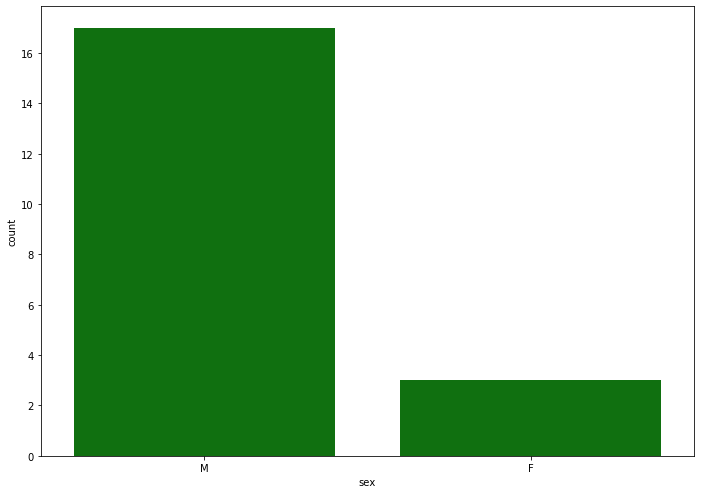

In [ ]:
# gender ratio for top 20 highest earning employee
sns.countplot("sex", data=plt1,color='green')
plt.show()

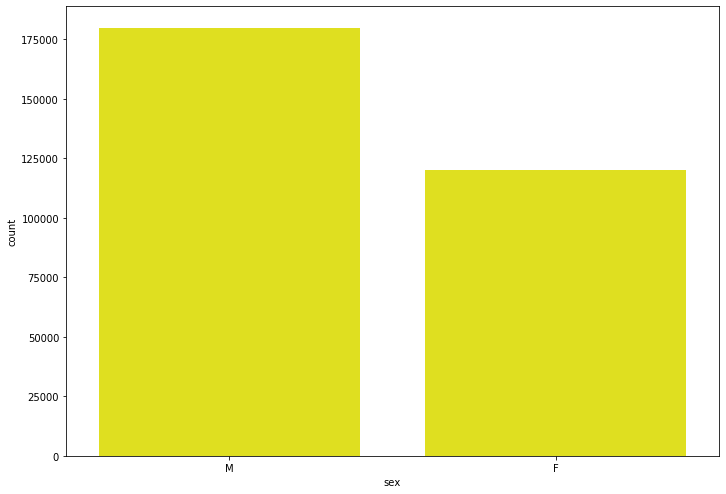

In [ ]:
#gender ratio overall 
gender_ratio=spark.sql("select sex from employees")
plt2=gender_ratio.toPandas()
sns.countplot("sex", data=plt2,color='yellow')
plt.show()

### top 20  Highest earning employees are shown on above table ; Gridswold Charmane is being one who is earning highest among all at 129492, Majority of top  20 highest  earning employee are Male , there are only three percentage of women included in top 20 highest earning employee.

In [13]:
#analysis which designation has most probability of churn and does salary depending of employee churning 
df2=spark.sql("""
select titles.title,salaries.salary, employees.left_ from titles 
JOIN  employees on titles.title_id=employees.emp_title_id 
JOIN salaries on employees.emp_no=salaries.emp_no order by salaries.salary desc
""")

In [ ]:
#plot for 
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt3=df2.toPandas()
sns.barplot(x='title',y='salary',hue='left_',data=plt3)
plt.title(" employee churn rate w.r.t salary and their designation")
plt.show()
sns.countplot("title",data=plt3)
plt.show()

### According to given illustration , Majority of employees are in IT sector. Managers might churn regardingless of salary, There is high churn rate in manager designation at high salary.


In [ ]:
##analysis on department wise salary as well employee churn rate
df3=spark.sql("""
select titles.title,salaries.salary, employees.no_of_projects from titles 
JOIN  employees on titles.title_id=employees.emp_titles_id 
JOIN salaries on employees.emp_no=salaries.emp_no order by salaries.salary desc
""")

In [ ]:
df4=spark.sql("""
select titles.title,salaries.salary, employees.last_performance_rating from titles 
JOIN  employees on titles.title_id=employees.emp_titles_id 
JOIN salaries on employees.emp_no=salaries.emp_no order by salaries.salary desc
""")

In [ ]:
plt5=df4.toPandas()
plt5.head()b

,title,salary,last_performance_rating
0,Staff,129492,PIP
1,Senior Staff,127238,A
2,Staff,127041,A
3,Staff,126703,C
4,Staff,125469,B


# 4. Feature Engineering 

In [ ]:
#convert string date type to date format 
from pyspark.sql.functions import to_timestamp,to_date
emp_df = emp_df.withColumn("Birth_date1",to_date(col("birth_date")," dd-MM-yyyy"))
emp_df = emp_df.withColumn("Hire_date1",to_date(col("hire_date")," dd-MM-yyyy "))

In [95]:
#log transformation
from pyspark.sql.functions import col, log
emp_df = emp_df.withColumn( 'salary_log', log('salary') )
emp_df = emp_df.withColumn( 'No_Projects', log('no_of_projects') )

# 5. Encoding 

In [96]:
from pyspark.sql import functions as F
emp_df = emp_df.withColumn('label',F.when(emp_df.left == 'true', 1)
                                   .otherwise(0)
)
emp_df = emp_df.withColumn('Gender',F.when(emp_df.sex == 'M', 1)
                                   .otherwise(0)
)

In [97]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [98]:
# create object of StringIndexer class and specify input and output column
SI_Performance = StringIndexer(inputCol='Last_performance_rating',outputCol='Last_Performance_Index')
SI_dept_name = StringIndexer(inputCol='dept_name',outputCol='dept_name_Index')
SI_title= StringIndexer(inputCol='title',outputCol='title_Index')
SI_no_of_projects=StringIndexer(inputCol='no_of_projects',outputCol='no_of_projects_Index')
SI_salary=StringIndexer(inputCol='salary_log',outputCol='salary_Index')


In [99]:
# transform the data
emp_df= SI_Performance.fit(emp_df).transform(emp_df)
emp_df = SI_dept_name.fit(emp_df).transform(emp_df)
emp_df = SI_title.fit(emp_df).transform(emp_df)
emp_df = SI_no_of_projects.fit(emp_df).transform(emp_df)
emp_df = SI_salary.fit(emp_df).transform(emp_df)


In [ ]:
 #view the transformed data
emp_df.select('Last_performance','Last_Performance_index','dept_name','dept_name_index',
              'title','title_index','emp_no','emp_no_index','birth_date','birth_date_index',
               'hire_date','hire_date_index').show(2)


+----------------+----------------------+------------------+---------------+------------------+-----------+------+------------+----------+----------------+----------+---------------+
|Last_performance|Last_Performance_index|         dept_name|dept_name_index|             title|title_index|emp_no|emp_no_index|birth_date|birth_date_index| hire_date|hire_date_index|
+----------------+----------------------+------------------+---------------+------------------+-----------+------+------------+----------+----------------+----------+---------------+
|               C|                   2.0|       development|            0.0|   Senior Engineer|        1.0| 10001|    101662.0|  9/2/1953|          2641.0| 6/26/1986|         1263.0|
|               B|                   0.0|             Sales|            2.0|             Staff|        0.0| 10002|     63450.0|  6/2/1964|          3796.0|11/21/1985|           48.0|
|               C|                   2.0|        Production|            1.0|   Senior

In [71]:
#columns after using stringidex
emp_df.columns

['emp_no',
 'dept_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'Last_performance_rating',
 'left',
 'last_date',
 'dept_name',
 'salary',
 'title_id',
 'title',
 'Churn',
 'Gender',
 'salary_log',
 'No_Projects',
 'Last_Performance_Index',
 'dept_name_Index',
 'title_Index',
 'no_of_projects_Index',
 'salary_Index']

# 6. Feature Selection

In [101]:
assembler = VectorAssembler(inputCols = [
 'Gender',
 'no_of_projects_Index',
 'Last_Performance_Index',
  'salary_Index',
 'dept_name_Index',
 'title_Index'
], outputCol = "features")

In [103]:
emp_data= assembler.transform(emp_df).select('label','features')
emp_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[1.0,7.0,1.0,0.0,...|
|    0|[0.0,6.0,2.0,4934...|
|    0|[0.0,0.0,1.0,1784...|
|    0|[1.0,7.0,2.0,0.0,...|
|    0|[0.0,1.0,0.0,0.0,...|
|    0|[1.0,4.0,0.0,0.0,...|
|    0|[1.0,2.0,1.0,1072...|
|    0|[1.0,7.0,1.0,0.0,...|
|    0|[1.0,8.0,1.0,2330...|
|    0|[0.0,1.0,0.0,0.0,...|
|    0|[0.0,6.0,3.0,0.0,...|
|    0|[1.0,4.0,2.0,2884...|
|    0|[0.0,3.0,2.0,0.0,...|
|    0|[0.0,3.0,2.0,0.0,...|
|    0|[0.0,0.0,2.0,4588...|
|    0|[1.0,3.0,2.0,0.0,...|
|    0|[1.0,3.0,2.0,6830...|
|    0|[1.0,0.0,0.0,1548...|
|    0|[1.0,5.0,1.0,1473...|
|    0|[1.0,2.0,2.0,1273...|
+-----+--------------------+
only showing top 20 rows



# 7. Modelling 

In [104]:
#split the train data
train_df, test_df = emp_data.randomSplit( [0.7, 0.3], seed = 42 )

In [105]:
def train(train, test, classifier):
 
  print(classifier)
  model = classifier.fit(train)

  pred = model.transform(test)

  eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))
  
  eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
  
  eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
  
  eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

  accuracy = eval_accuracy.evaluate(pred)

  precision =  eval_precision.evaluate(pred)

  recall =  eval_recall.evaluate(pred)

  f1 =  eval_f1.evaluate(pred)

  print(f"""
  Accuracy  = {accuracy}
  Error     = {1-accuracy}
  Precision = {precision}
  Recall    = {recall}
  F1        = {f1}""")

  return model, pred

In [92]:
rfm2 = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=32,
                              maxDepth=5
                              )
_ , pred2 = train(train_df, test_df, rfm2)

pred2.select("prediction", "label", "features").show()

RandomForestClassifier_39c1b87a9fc1

  Accuracy  = 0.8952380952380953
  Error     = 0.10476190476190472
  Precision = 0.8933314415437004
  Recall    = 0.8952380952380952
  F1        = 0.877222675424607
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|    0|(16,[1,2,3,4,5,6,...|
|       0.0|    0|[0.0,12.5,67.0,2....|
|       0.0|    0|[0.0,18.9,92.0,3....|
|       0.0|    0|[0.0,27.0,117.0,4...|
|       0.0|    0|[0.0,39.5,78.0,6....|
|       0.0|    0|[0.0,40.4,105.0,6...|
|       0.0|    0|[0.0,41.9,124.0,7...|
|       0.0|    0|[0.0,49.2,121.0,8...|
|       0.0|    0|[0.0,51.1,106.0,8...|
|       0.0|    0|[0.0,51.8,107.0,8...|
|       0.0|    0|[0.0,51.9,108.0,8...|
|       0.0|    0|[0.0,54.8,92.0,9....|
|       0.0|    0|[0.0,55.3,102.0,9...|
|       0.0|    0|[0.0,55.6,65.0,9....|
|       0.0|    0|[0.0,57.1,98.0,9....|
|       0.0|    0|[0.0,58.0,125.0,9...|
|       0.0|    0|[0.0,58.2,96.0,9....